In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Starter_code/Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [8]:
# View all of the classes that automap found
inspector= inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Save references to each table
measurement= Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session= Session(engine)

In [11]:
#confirming my table variables came in correctly
data= session.query(station).first()
data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x162ce1890>,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
first_date =session.query(measurement.date).order_by(measurement.date).first()
first_date

('2010-01-01',)

latest date ('2017-08-23',)
one year from latest date is 2016-08-23


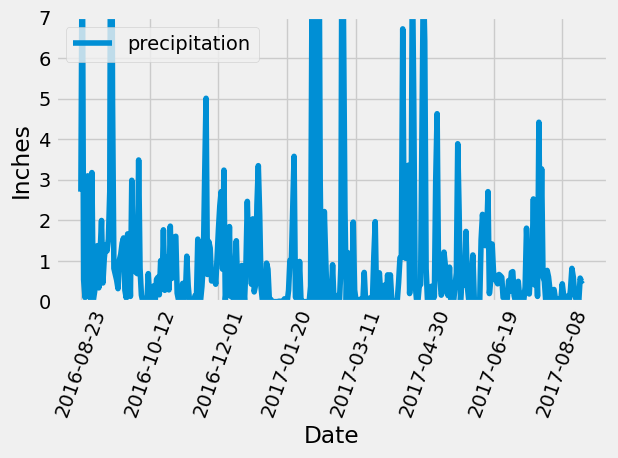

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
latest_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f'latest date {latest_date}')
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f"one year from latest date is {last_year}")

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, 
       func.sum(measurement.prcp)]
precipitation = session.query(*sel).\
        filter(measurement.date >= '2016-08-23').\
        group_by(measurement.date).\
        order_by(measurement.date).all()
precipitation
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation, columns=['date', 'precipitation'])
precipitation_df.dropna(axis=0, how='any', inplace= True)
precipitation_df.sort_values(by='date')
precipitation_df.set_index('date', inplace=True)
precipitation_df.head(20)

# Sort the dataframe by date
precipitation_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.ylim(0,7)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
total= session.query(station.station).count()
total

9

In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel= [measurement.station, func.count(measurement.tobs)]
most_active= session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.tobs).desc())
most_active.all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
#Answer the following question: which station id has the greatest number of observations?

print('station ID USC00519281 has the greatest number of observations')

station ID USC00519281 has the greatest number of observations


In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel=[measurement.station, func.min(measurement.tobs), func.max(measurement.tobs),
     func.avg(measurement.tobs)]
station_temp= session.query(*sel).\
filter(measurement.station=='USC00519281').\
group_by(measurement.station)
for station in station_temp:
    print(station)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel=[measurement.date, measurement.tobs]
temps= session.query(*sel).\
filter(measurement.date >= '2016-08-23', measurement.date <= '2017-08-23', measurement.station =='USC00519281').\
group_by(measurement.date).\
order_by(measurement.date).all()

temps_df= pd.DataFrame(temps, columns=['Date', 'Temperature'])
temps_df.head(50)

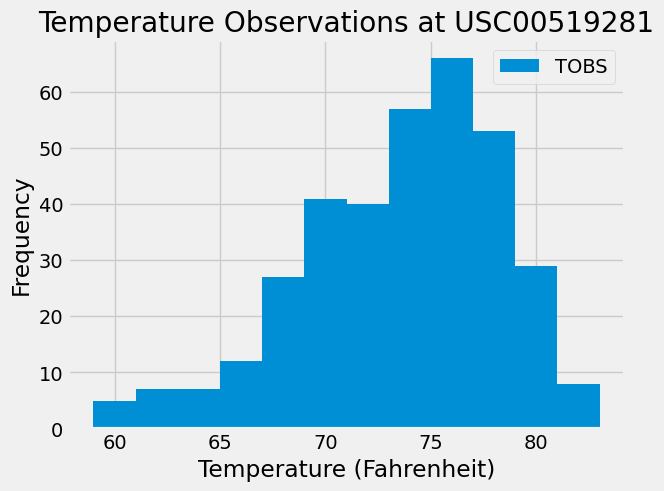

In [69]:
#histogram
plt.hist(temps_df['Temperature'],bins=12, density=False, label="TOBS")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Temperature Observations at USC00519281")
plt.figsize=(10,7)
plt.savefig('Annual_Temps_USC00519281.png',bbox_inches='tight')
plt.show()

# Close Session

In [70]:
# Close Session
session.close()